In [1]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
using LinearAlgebra
import JSON
using Random

In [2]:
plotdata = JSON.parsefile("../results/figures-3-4-5-datasets.json")

Dict{String,Any} with 3 entries:
  "figure3_dataset" => Dict{String,Any}("ACE"=>Any[Any[0.0, 1.01124, 2.02247, 3…
  "figure5_dataset" => Dict{String,Any}("ACE"=>Any[Any[Any[1.0e-12, 1.58489e-12…
  "figure4_dataset" => Dict{String,Any}("ACE"=>Any[Any[1.0e-12, 1.23719e-12, 1.…

In [3]:
f3d = plotdata["figure3_dataset"]
f4d = plotdata["figure4_dataset"]
f5d = plotdata["figure5_dataset"]

Dict{String,Any} with 7 entries:
  "ACE"      => Any[Any[Any[1.0e-12, 1.58489e-12, 2.51189e-12, 3.98107e-12, 6.3…
  "SOAPlite" => Any[Any[Any[1.0e-12, 1.29155e-12, 1.6681e-12, 2.15443e-12, 2.78…
  "ACSF-X"   => Any[Any[Any[1.0e-8, 1.25893e-8, 1.58489e-8, 1.99526e-8, 2.51189…
  "SOAP"     => Any[Any[Any[1.0e-12, 1.23719e-12, 1.53064e-12, 1.8937e-12, 2.34…
  "CHSF-mix" => Any[Any[Any[1.0e-12, 1.58489e-12, 2.51189e-12, 3.98107e-12, 6.3…
  "ACSF"     => Any[Any[Any[1.0e-12, 1.67683e-12, 2.81177e-12, 4.71487e-12, 7.9…
  "CHSF"     => Any[Any[Any[1.0e-12, 1.58489e-12, 2.51189e-12, 3.98107e-12, 6.3…

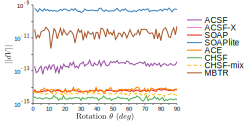

In [4]:
l = @layout [ a ; b{0.35h} ]

cur_colors1 = get_color_palette(:Paired, plot_color(:white), 100)
cur_colors = get_color_palette(:Set1, plot_color(:white), 100)

selc = [cur_colors[8],cur_colors[9],cur_colors[1],cur_colors[6],
        cur_colors[3],cur_colors[4],cur_colors[11],cur_colors[5]]
selsize = [2,2,2,2,2,2,2,2]
seltyp = [:solid, :solid, :solid, :solid, 
          :solid, :solid, :dash,  :solid]

labels=["ACSF","ACSF-X","SOAP","SOAPlite","ACE","CHSF","CHSF-mix","MBTR"]

p3 = plot(f3d[labels[1]][1][2:90], f3d[labels[1]][2][2:90], 
          lw=selsize[1], ls= seltyp[1], label=labels[1], 
          color=selc[1], seriescolor =:Paired)

for i=2:length(f3d)
    if labels[i] == "SOAPlite" || labels[i] == "MBTR"
        p3 = plot!(f3d[labels[i]][1][2:90], f3d[labels[i]][2][2:90], 
                   lw=selsize[i], ls= seltyp[i], label=labels[i], 
                   color=selc[i], seriescolor =:Paired)
    else
        p3 = plot!(f3d[labels[i]][1], f3d[labels[i]][2], 
                   lw=selsize[i], ls= seltyp[i], label=labels[i], 
                   color=selc[i], seriescolor =:Paired)
    end
end

p3 = plot!(size=(500,250);  yaxis = (:log,), legend = :outertopright,
           fg_legend = :transparent, bg_legend = :transparent,
           left_margin = [1mm 0mm],
           right_margin = [5mm 0mm],
           top_margin = [0.5mm 0mm],
           bottom_margin = [1mm 0mm],
           dpi=300, 
           xtick_direction=:out, ytick_direction=:out, 
           grid=:false,
           xticks = (collect(0:5:90), [ i%2==1 ? "$e" : "" for (i,e) in enumerate(0:5:90)]),
           yticks = (exp10.(-15:1:-9), [ i%2==1 ? "10^{$e}" : "" for (i,e) in enumerate(-15:1:-9)])
           )

ylims!((exp10.(-15),exp10.(-9)))
xlims!((0,90))

xlabel!(L"\textrm{Rotation } \theta \textrm{ }(deg)")
ylabel!(L"||dV||")

plot(p3, dpi=50)

In [5]:
savefig("figure3.pdf")

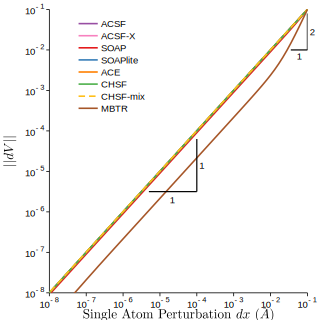

In [6]:
norm_pert(x) = 0.1 * x/maximum(x)

for i=1:length(f4d)
    if i == 1
        p4 = plot(f4d[labels[1]][1], norm_pert(f4d[labels[1]][2]), 
                  lw=selsize[1], ls= seltyp[1], label=labels[1], 
                  color=selc[1], seriescolor =:Paired)
    else
        p4 = plot!(f4d[labels[i]][1], norm_pert(f4d[labels[i]][2]), 
                   lw=selsize[i], ls= seltyp[i], label=labels[i], 
                   color=selc[i], seriescolor =:Paired)
    end
end

p4 = plot!(size=(400,400); xaxis = (:log,), yaxis = (:log,), legend=(0.2,0.95), 
           fg_legend = :transparent, bg_legend = :transparent)
p4 = plot!(exp10.(-5.3:0.1:-4), [exp10.(-5.5) for x in exp10.(-5.3:0.1:-4)], 
           lw=1.5, c=:black, label=nothing)
p4 = plot!([exp10.(-4.0) for x in exp10.(-5.5:0.1:-4.2)], exp10.(-5.5:0.1:-4.2), 
           lw=1.5, c=:black, label=nothing,
           dpi=300, xtick_direction=:out, ytick_direction=:out, 
           grid=:false,
           xticks = exp10.(-8:1:-1),
           yticks = exp10.(-8:1:-1),
           left_margin = [0mm 0mm],
           right_margin = [2mm 0mm],
           top_margin = [1mm 0mm],
           bottom_margin = [0mm 0mm])

p4 = plot!(exp10.(-1.45:0.05:-1.0), [exp10.(-2.0) for x in exp10.(-1.45:0.05:-1.0)], 
           lw=1.5, c=:black, label=nothing)
p4 = plot!([exp10.(-1.0) for x in exp10.(-2:0.1:-1.1)], exp10.(-2:0.1:-1.1), 
           lw=1.5, c=:black, label=nothing)

annotate!(exp10.(-4.6), exp10.(-5.7), text("1", :black, :right, 8))
annotate!(exp10.(-3.8), exp10.(-4.85), text("1", :black, :right, 8))
annotate!(exp10.(-0.8), exp10.(-1.55), text("2", :black, :right, 8))
annotate!(exp10.(-1.15), exp10.(-2.15), text("1", :black, :right, 8))
ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-8.0),exp10.(-1)))
xlabel!(L"\textrm{Single Atom Perturbation } dx \textrm{ }(\AA)")
ylabel!(L"||dV||")

plot(p4, dpi=80)

In [7]:
savefig("figure4.pdf")

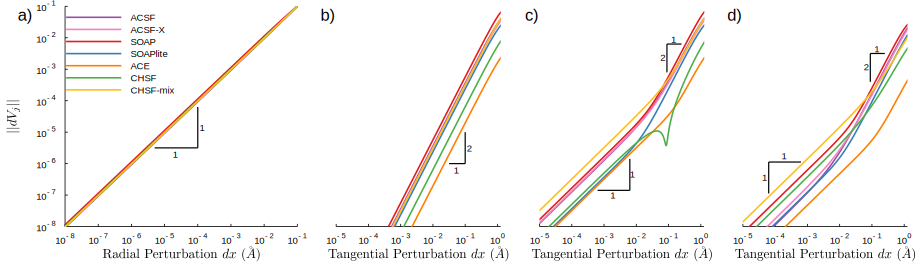

In [8]:
norm_pert(x) = x
norm_pert2(x) = 0.1 * x/maximum(x)

l = @layout [ a{0.32w} b c d ]

seltyp = [:solid, :solid, :solid, :solid, 
          :solid, :solid, :solid,  :solid]

#--------- col 1
p51 = plot(f5d[labels[1]][1][1], norm_pert2(f5d[labels[1]][1][2]), 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p51 = plot!(f5d[labels[i]][1][1], norm_pert2(f5d[labels[i]][1][2]), 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p51 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,),  
            legend=false, #legend=(0.85,0.25), 
            fg_legend = :transparent, 
            bg_legend = :transparent, grid=false,
            left_margin = [3mm 0mm],
            right_margin = [0mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8),exp10.(-1)))
xlims!((exp10.(-8),exp10.(-1)))

#1-1
p51 = plot!(exp10.(-5.3:0.1:-4), [exp10.(-5.5) for x in exp10.(-5.3:0.1:-4)], 
            lw=1.5, c=:black, label=nothing)
p51 = plot!([exp10.(-4.0) for x in exp10.(-5.5:0.1:-4.2)], exp10.(-5.5:0.1:-4.2), 
            lw=1.5, c=:black, label=nothing)

#1-1
annotate!(exp10.(-4.6), exp10.(-5.7), text("1", :black, :right, 8))
annotate!(exp10.(-3.8), exp10.(-4.85), text("1", :black, :right, 8))
annotate!(exp10.(-9),exp10.(-1),text("a)", 14, :right, :top, :black, :regular))

xlabel!(L"\textrm{Radial Perturbation } dx \textrm{ }(\AA)")
ylabel!(L"||dV_j|| \textrm{ }")

#--------- col 2

p52 = plot(f5d[labels[1]][2][1], norm_pert(f5d[labels[1]][2][2]) .+ 1e-20, 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p52 = plot!(f5d[labels[i]][2][1], norm_pert(f5d[labels[i]][2][2]) .+ 1e-20, 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p52 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,),  
            legend=(-1.25,0.95), grid=false, 
            fg_legend = :transparent, 
            bg_legend = :transparent, yshowaxis=false,
            left_margin = [-2mm 0mm],
            right_margin = [0mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-5.0),exp10.(0.1)))

#1-2
p52 = plot!(exp10.(-1.5:0.1:-1.0), [exp10.(-6.0) for x in exp10.(-1.5:0.1:-1.0)], 
            lw=1.5, c=:black, label=nothing)
p52 = plot!([exp10.(-1.0) for x in exp10.(-6:0.2:-5.0)], exp10.(-6:0.2:-5.0), 
            lw=1.5, c=:black, label=nothing)

#1-2
annotate!(exp10.(-1.2), exp10.(-6.2), text("1", :black, :right, 8))
annotate!(exp10.(-0.8), exp10.(-5.5), text("2", :black, :right, 8))
annotate!(exp10.(-5.05),exp10.(-1),text("b)", 14, :right, :top, :black, :regular))

xlabel!(L"\textrm{Tangential Perturbation } dx \textrm{ }(\AA)")

#--------- col 3

p53 = plot(f5d[labels[1]][3][1], norm_pert(f5d[labels[1]][3][2]) .+ 1e-20, 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p53 = plot!(f5d[labels[i]][3][1], norm_pert(f5d[labels[i]][3][2]) .+ 1e-20, 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p53 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,), 
            legend=false, legendfont=8, grid=false, 
            fg_legend = :transparent, 
            bg_legend = :transparent, yshowaxis=false,
            left_margin = [-2mm 0mm],
            right_margin = [0mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-5.0),exp10.(0.1)))

p53 = plot!(exp10.(-3.2:0.1:-2.2), [exp10.(-6.85) for x in exp10.(-3.2:0.1:-2.2)], 
            lw=1.5, c=:black, label=nothing)
p53 = plot!([exp10.(-2.2) for x in exp10.(-6.85:0.1:-5.85)], exp10.(-6.85:0.1:-5.85), 
            lw=1.5, c=:black, label=nothing)
p53 = plot!(exp10.(-1.05:0.05:-0.6), [exp10.(-2.2) for x in exp10.(-1.05:0.05:-0.6)], 
            lw=1.5, c=:black, label=nothing)
p53 = plot!([exp10.(-1.05) for x in exp10.(-3.1:0.05:-2.2)], exp10.(-3.1:0.05:-2.2), 
            lw=1.5, c=:black, label=nothing)
annotate!(exp10.(-2.65), exp10.(-7.0), text("1", :black, :right, 8))
annotate!(exp10.(-2.05), exp10.(-6.33), text("1", :black, :right, 8))
annotate!(exp10.(-1.1), exp10.(-2.62), text("2", :black, :right, 8))
annotate!(exp10.(-0.77), exp10.(-2.05), text("1", :black, :right, 8))


annotate!(exp10.(-5.05),exp10.(-1),text("c)", 14, :right, :top, :black, :regular))
xlabel!(L"\textrm{Tangential Perturbation } dx \textrm{ }(\AA)")

#--------- col 4

p54 = plot(f5d[labels[1]][4][1], norm_pert(f5d[labels[1]][4][2]) .+ 1e-20, 
           lw=selsize[1], ls= seltyp[1], label=labels[1], 
           color=selc[1], seriescolor =:Paired)

for i=2:length(f5d)
    p54 = plot!(f5d[labels[i]][4][1], norm_pert(f5d[labels[i]][4][2]) .+ 1e-20, 
                lw=selsize[i], ls= seltyp[i], label=labels[i], 
                color=selc[i], seriescolor =:Paired)
end

p54 = plot!(size=(1150,350); xaxis = (:log,), yaxis = (:log,), 
            legend=false, grid=false,
            fg_legend = :transparent, 
            bg_legend = :transparent, yshowaxis=false,
            left_margin = [-2mm 0mm],
            right_margin = [2mm 0mm],
            top_margin = [0mm 0mm],
            bottom_margin = [4mm 0mm])

ylims!((exp10.(-8.0),exp10.(-1)))
xlims!((exp10.(-5.0),exp10.(0.1)))

#1-1
p54 = plot!(exp10.(-4.2:0.1:-3.2), [exp10.(-5.95) for x in exp10.(-3.5:0.1:-2.5)], 
            lw=1.5, c=:black, label=nothing)
p54 = plot!([exp10.(-4.2) for x in exp10.(-6.95:0.1:-5.95)], exp10.(-6.95:0.1:-5.95), 
            lw=1.5, c=:black, label=nothing)
#1-2
p54 = plot!(exp10.(-1.05:0.05:-0.6), [exp10.(-2.5) for x in exp10.(-1.05:0.05:-0.6)], 
            lw=1.5, c=:black, label=nothing)
p54 = plot!([exp10.(-1.05) for x in exp10.(-3.4:0.05:-2.5)], exp10.(-3.4:0.05:-2.5), 
            lw=1.5, c=:black, label=nothing)

#1-1
annotate!(exp10.(-3.65), exp10.(-5.75), text("1", :black, :right, 8))
annotate!(exp10.(-4.25), exp10.(-6.43), text("1", :black, :right, 8))
#1-2
annotate!(exp10.(-1.1), exp10.(-2.92), text("2", :black, :right, 8))
annotate!(exp10.(-0.77), exp10.(-2.35), text("1", :black, :right, 8))
annotate!(exp10.(-5.05),exp10.(-1),text("d)", 14, :right, :top, :black, :regular))

xlabel!(L"\textrm{Tangential Perturbation } dx \textrm{ }(\AA)")

#----

pp = plot(p51,p52,p53,p54,layout=l, dpi=80)
pp

In [9]:
savefig("figure5.pdf")